## Linear Regression

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv('lr_ex.csv')
df

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556
...,...,...
295,296,200.555556
296,297,201.222222
297,298,201.888889
298,299,1.888889


In [6]:
print(df.tail(10))

       X           Y
290  291  197.222222
291  292  197.888889
292  293  198.555556
293  294  199.222222
294  295  199.888889
295  296  200.555556
296  297  201.222222
297  298  201.888889
298  299    1.888889
299  300    1.888889


- Extract the values from the "X" column of the DataFrame and convert it to a NumPy array.

- Reshape the 'x' array to a 2D array with one column and as many rows as needed (-1 means infer the number of rows).

- The reason for reshaping is to prepare the data for certain operations, like when using scikit-learn models.


In [8]:
x = df["X"].to_numpy().reshape(-1,1) 

- Extract the values from the "Y" column of the DataFrame and convert it to a NumPy array.
- Reshape the 'y' array to a 2D array with one column and as many rows as needed (-1 means infer the number of rows).
- This is done to ensure the target 'y' has the same shape as the feature 'x' for certain operations.


In [9]:
y = df["Y"].to_numpy().reshape(-1,1)

.......

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.33)

from sklearn.preprocessing import StandardScaler #remove the mean and scale to unit variance
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

R2 score:  0.8799343321239979
MSE:  397.2926711932955


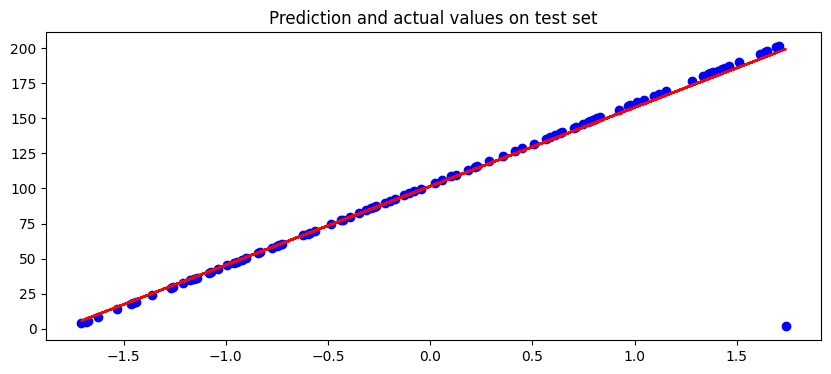

In [12]:
import sklearn as sk

from sklearn.linear_model import LinearRegression
mdl = LinearRegression()
mdl.fit(x_train, y_train)
y_pred = mdl.predict(x_test)
r2 = sk.metrics.r2_score(y_test, y_pred)
mse_test = sk.metrics.mean_squared_error(y_test, y_pred)
print("R2 score: ", r2)
print("MSE: ", mse_test)


plt.figure(figsize=(10,4))
plt.title("Prediction and actual values on test set")

plt.scatter(x_test, y_test, color = 'blue')
plt.plot(x_test, y_pred, color = 'red')
plt.show()

## Polynomial Regression

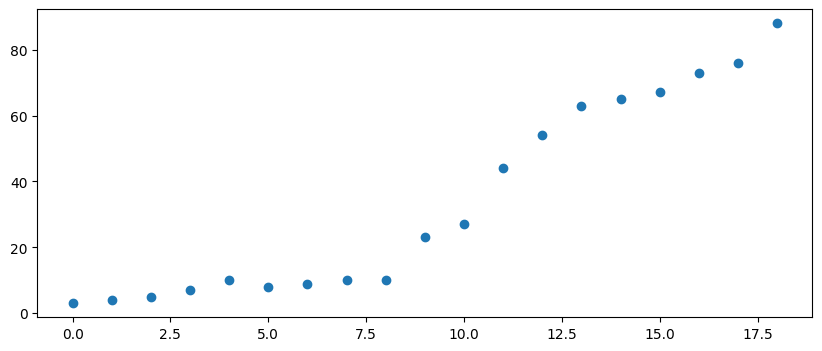

In [13]:
y = [3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 54, 63, 65, 67, 73, 76, 88]
x = np.arange(len(y))  # Create an array of indices (0 to len(y)-1)

plt.figure(figsize=(10, 4))
plt.scatter(x, y)
plt.show()


In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

In [15]:
poly_features = poly.fit_transform(x.reshape(-1,1))

In [16]:
mdl.fit(poly_features, y)

LinearRegression()

In [17]:
y_predicted = mdl.predict(poly_features)

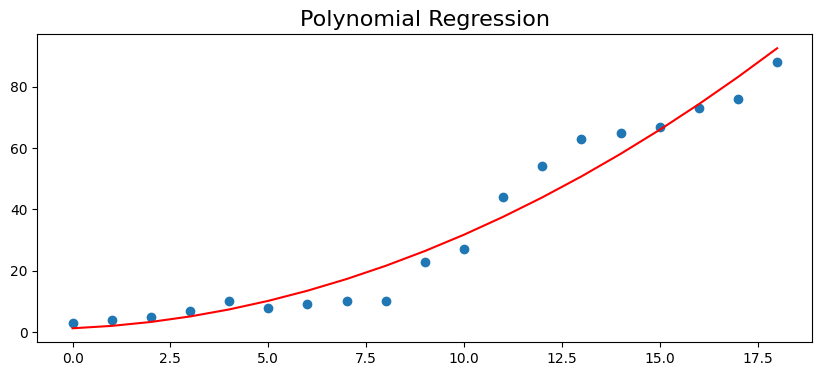

In [18]:
plt.figure(figsize=(10,4))
plt.title("Polynomial Regression", size = 16)
plt.scatter(x,y)
plt.plot(x, y_predicted, color = 'red')
plt.show()

In [26]:
!pip install statsmodels
!pip install --upgrade pip


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: To modify pip, please run the following command:
C:\Python311\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pip-23.2-py3-none-any.whl (2.1 MB)


In [27]:
# Stepwise_Regression
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Sample data (replace this with your own dataset)
data = {
    'y': [10, 15, 12, 8, 20, 18, 25, 30, 22, 28],
    'x1': [5, 8, 7, 3, 10, 9, 15, 18, 12, 14],
    'x2': [2, 4, 3, 1, 6, 5, 8, 9, 7, 7],
    'x3': [3, 6, 4, 2, 8, 7, 11, 12, 9, 10],
    'x4': [1, 3, 2, 1, 5, 4, 7, 8, 6, 6]
}

df = pd.DataFrame(data)

# Stepwise regression using forward selection
def forward_selected(data, response):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0

    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            model = sm.OLS(data[response], sm.add_constant(data[selected + [candidate]])).fit()
            score = model.rsquared_adj
            scores_with_candidates.append((score, candidate))
        
        scores_with_candidates.sort(reverse=True)
        best_new_score, best_candidate = scores_with_candidates.pop(0)
        
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
            
    return selected

# Target variable (dependent variable)
target = 'y'

# Run forward selection
selected_predictors = forward_selected(df, target)
print("Selected predictors using forward selection:", selected_predictors)

# Fit the final model with selected predictors
final_model = sm.OLS(df[target], sm.add_constant(df[selected_predictors])).fit()

# Print the summary of the final model
print(final_model.summary())


Selected predictors using forward selection: ['x3', 'x1']
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     120.1
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           3.82e-06
Time:                        23:24:56   Log-Likelihood:                -16.080
No. Observations:                  10   AIC:                             38.16
Df Residuals:                       7   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

C:\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
